# Chapter 7 Figures and Moments

In [1]:
import Pkg; 
Pkg.activate(joinpath(@__DIR__, "..")); 
Pkg.instantiate()

  Activating environment at `~/Github/TheEconomicsofSovereignDebt/Project.toml`


In [2]:
using LTBonds 
using Plots
using LaTeXStrings 
using Random 
using PrettyTables

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342


In [ ]:
pretty_table_output = :html # change to :text if running from terminal 

In [3]:
include("plotting_functions.jl")

plot_pol (generic function with 1 method)

In [4]:
modelLB, modelSB, modelLB2 = map((0.05, 1.0, 0.025)) do λ
    R = 1.01
    β = 0.9540232420
    pref = Preferences(β = β, u = make_CRRA(ra = 2))
    y = discretize(YProcess(n = 200, ρ = 0.948503, std = 0.027092, μ = 0.0, span = 3.0, tails = false))
    m = MTruncatedNormal(; std = (λ < 0.05 ? 0.005 : 0.003), span = 2.0)
    bond = BondCE2012(n = 350, min = 0.0, max = 1.5, κ = 0.03, λ = λ)
    penalty = DefCosts(pen1 = -0.1881927550, pen2 = 0.2455843389, quadratic = true, reentry = 0.0385)
    generate_workspace(LTBondModel(
        y = y,
        m = m, 
        preferences = pref, 
        bond = bond, 
        def_costs = penalty, 
        R = R
    ))
end;

In [5]:
for m in (modelLB, modelSB, modelLB2)
    @time solve!(m; max_iters = 10000, g = 0.5, err = 1e-10, print_every = 50)
end 

1: (v = 0.8122395110817493, q = 0.4288247529544054, vD = 0.28584225935411567)
51: (v = 0.013495958526153373, q = 0.25866142327043395, vD = 0.013933345030824995)
101: (v = 0.010719474036431365, q = 0.15650856655682188, vD = 0.00226875646886171)
151: (v = 0.0061761231316666, q = 0.07253686986843366, vD = 0.0024108490243364145)
201: (v = 0.003056651129380583, q = 0.034174914256184685, vD = 0.0014852940121059532)
251: (v = 0.0015076349102720599, q = 0.016921395266010553, vD = 0.0007771552876718602)
301: (v = 0.000637834896078715, q = 0.004753031342358605, vD = 0.0003768644172730262)
351: (v = 0.00029528317425686623, q = 0.0022003541286849115, vD = 0.00017161139841093132)
401: (v = 0.00011815695196659703, q = 0.0007939511810366451, vD = 7.881232448880837e-5)
451: (v = 4.53531047206468e-5, q = 0.0002656152963961267, vD = 3.2709271611253143e-5)
501: (v = 1.8048956210492406e-5, q = 9.96550713964206e-5, vD = 1.3400077072844852e-5)
551: (v = 7.416740071874983e-6, q = 4.199943810589968e-5, vD = 5

## Figures

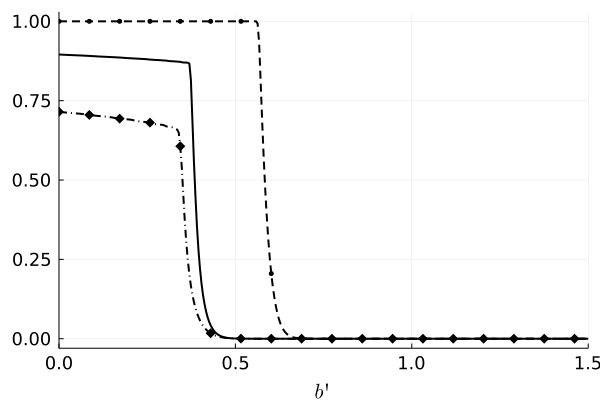

In [13]:
#plot prices at lowest Y (Figure 7-6 (a))
f = plot_q(1, modelLB, modelSB, modelLB2)
savefig(f, (joinpath(@__DIR__,"..","output","Chapter7","fig_7_6a.pdf" )))
f

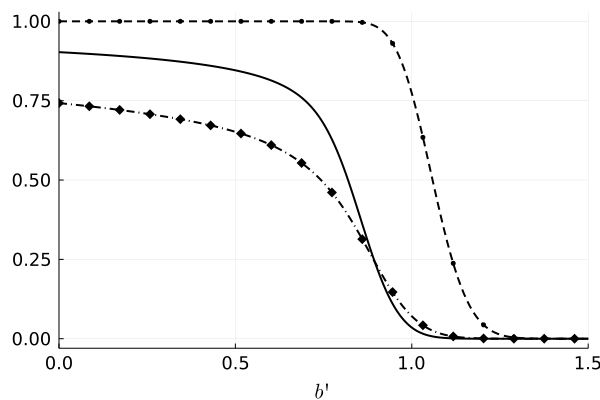

In [14]:
#plot prices at mean Y (Figure 7-6 (b))
midY = length(get_y_grid(modelLB)) ÷ 2
f = plot_q(midY, modelLB, modelSB, modelLB2)
savefig(f, (joinpath(@__DIR__,"..","output","Chapter7","fig_7_6b.pdf" )))
f

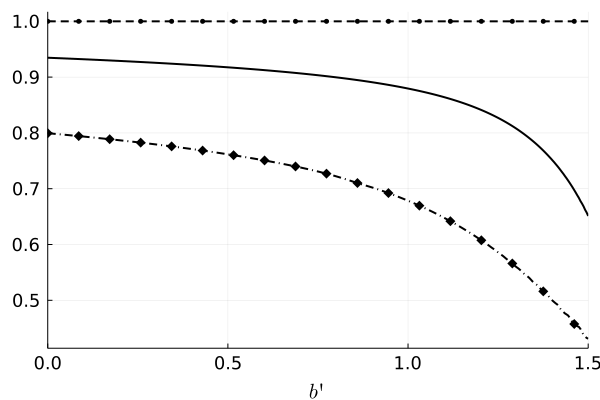

In [15]:
#plot prices at max Y (Figure 7-6 (c))
f = plot_q(length(get_y_grid(modelLB)), modelLB, modelSB, modelLB2)
savefig(f, (joinpath(@__DIR__,"..","output","Chapter7","fig_7_6c.pdf" )))
f

In [16]:
###simulations
big_T = 20_000 
big_N = 1_000
rng = Random.seed!(1234)

MersenneTwister(1234)

In [17]:
@time shocks, paths = create_shocks_paths(modelLB, big_T, big_N; rng) 
@time simulation!(paths, shocks, modelLB; n = big_T, trim = 1000, trim_def = 20)
@time moments_LB = moments(paths, modelLB)
pretty_table(
    [
        pairs(moments_LB),
    ],
    row_names = ["EGLB"],
    backend = Val(pretty_table_output)
)

  2.941123 seconds (63.02 k allocations: 3.091 GiB, 37.04% gc time)
  0.265677 seconds (7.12 k allocations: 993.906 KiB)


,mean_bp_y,mean_mv_y,def_rate,mean_spread,std_spread,std_c_y,cor_tb_y,cor_r_y,cor_r_b_y,cor_r_tb
EGLB,0.699848,0.703741,0.0680707,0.0814874,0.0444461,1.10613,-0.432888,-0.647651,-0.0297028,0.77274


  0.984076 seconds (5 allocations: 152.676 MiB)


In [18]:
moments_LB, moments_SB, moments_LB2 =map((modelLB, modelSB, modelLB2)) do m
    @time simulation!(paths, shocks, m; n = big_T, trim = 1000, trim_def = 20)
    moments(paths, m)
    end;

  0.120077 seconds (7.01 k allocations: 984.703 KiB)
  0.131895 seconds (7.12 k allocations: 993.906 KiB)
  0.125248 seconds (7.12 k allocations: 993.969 KiB)


In [19]:
pretty_table(
    [
        pairs(moments_SB),
        pairs(moments_LB),
        pairs(moments_LB2)
    ],
    row_names = ["SB", "LB", "LB2"],
    backend = Val(pretty_table_output)
)

,mean_bp_y,mean_mv_y,def_rate,mean_spread,std_spread,std_c_y,cor_tb_y,cor_r_y,cor_r_b_y,cor_r_tb
SB,0.811992,0.803476,0.0024508,0.00255842,0.00370546,1.13529,-0.238525,-0.41847,-0.226018,0.884176
LB,0.699848,0.703741,0.0680707,0.0814874,0.0444461,1.10613,-0.432888,-0.647651,-0.0297028,0.77274
LB2,0.758304,0.61562,0.109779,0.152327,0.0857077,1.06393,-0.369127,-0.623916,0.278245,0.723646
